In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-survival-dataset/accident.csv


In [2]:
df = pd.read_csv('/kaggle/input/road-accident-survival-dataset/accident.csv')

In [3]:
df.head(10)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
5,25,Male,49.0,Yes,Yes,1
6,38,Male,116.0,Yes,Yes,1
7,56,Male,47.0,Yes,Yes,1
8,36,Female,83.0,Yes,No,1
9,40,Female,116.0,Yes,No,1


## Gathering understanding about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [6]:
df.duplicated().sum()

0

Survived
1    101
0     99
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


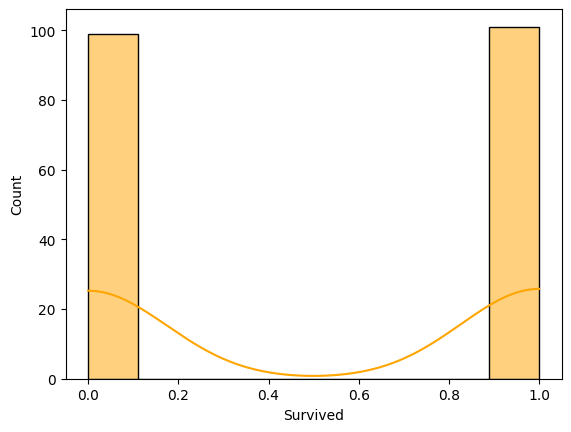

In [7]:
#Gathering the understanding about the Survival Distribution

import matplotlib.pyplot as plt
import seaborn as sns

print(df['Survived'].value_counts())
sns.histplot(df['Survived'],kde=True, color='orange')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


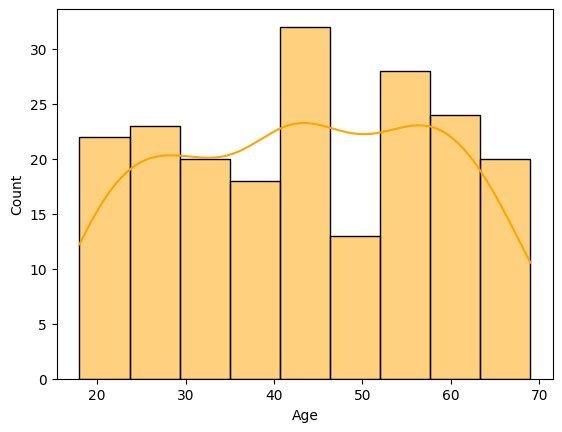

In [8]:
#Gathering the understanding about the Age Distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'],kde=True, color='orange')
plt.show()


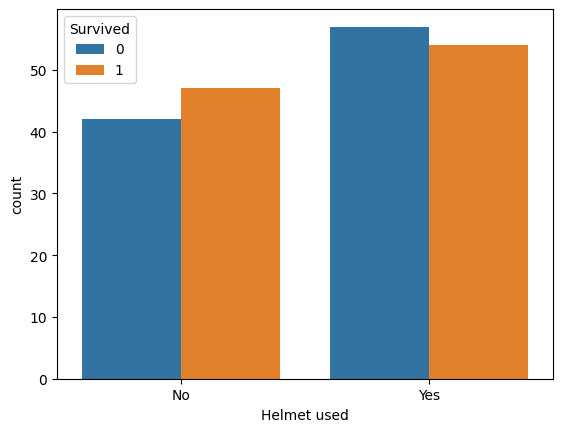

In [9]:
#Now try to understand how using Helmet creating impact on survival

sns.countplot(x='Helmet_Used', hue='Survived', data=df)
plt.xlabel('Helmet used')
plt.show()

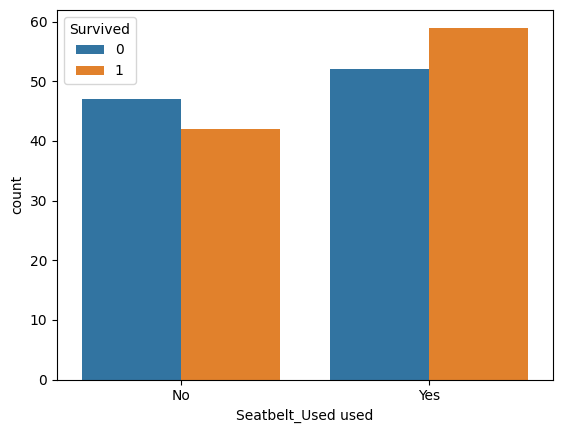

In [10]:
#Now try to understand how using Seatbelt creating impact on survival

sns.countplot(x='Seatbelt_Used', hue='Survived', data=df)
plt.xlabel('Seatbelt_Used used')
plt.show()

## SeatBelt is creating more impact factor to be survived

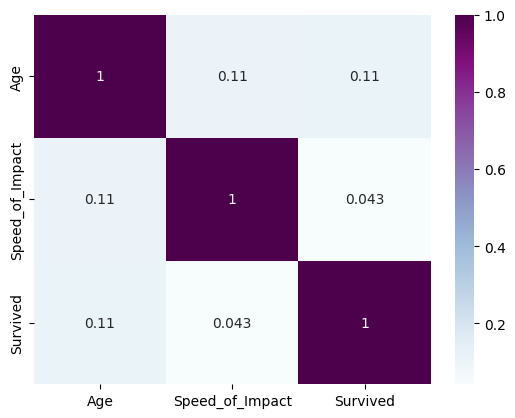

In [11]:
#Now We need to check the correlation between the numerical columns

calculated_corr = df[['Age', 'Speed_of_Impact', 'Survived']].corr()
sns.heatmap(calculated_corr, annot=True, cmap='BuPu')
plt.show()

## Cleaning And Transforming

In [12]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [14]:
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())

In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [16]:
df.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [17]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
oc = OneHotEncoder(drop='first',sparse_output = False)

In [20]:
df['Gender'] = oc.fit_transform(df[['Gender']])

In [21]:
df['Helmet_Used'] = oc.fit_transform(df[['Helmet_Used']])

In [22]:
df['Seatbelt_Used'] = oc.fit_transform(df[['Seatbelt_Used']])

In [23]:
df.head(10)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0.0,27.0,0.0,0.0,1
1,69,0.0,46.0,0.0,1.0,1
2,46,1.0,46.0,1.0,1.0,0
3,32,1.0,117.0,0.0,1.0,0
4,60,0.0,40.0,1.0,1.0,0
5,25,1.0,49.0,1.0,1.0,1
6,38,1.0,116.0,1.0,1.0,1
7,56,1.0,47.0,1.0,1.0,1
8,36,0.0,83.0,1.0,0.0,1
9,40,0.0,116.0,1.0,0.0,1
